### Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

# For Pre-Processing
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

# Splitting and Train For Dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# For Checking Testing Results
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import linear_model, decomposition, datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# For Clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from itertools import product
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# For Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

# Using HyperTuning
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline

# Using TensorFlow For ANN
from plotly.offline import iplot
import keras
from keras.utils import np_utils
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation

### Input The Dataset

In [2]:
df = pd.read_csv('student.csv')
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


### Description The Data

In [4]:
df.describe(include = 'all')

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.00000
mean,0.391000,0.519000,0.515000,2.480000,0.539000,52.208000,5.381570e+06,74.515300,86.097200,0.52000,0.50000
std,0.488219,0.499889,0.500025,1.399127,0.498726,3.500427,1.397546e+06,15.293346,3.378738,0.49985,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,1.000000e+06,20.000000,75.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,50.000000,4.360000e+06,64.600000,83.737500,0.00000,0.00000
50%,0.000000,1.000000,1.000000,3.000000,1.000000,52.000000,5.440000e+06,75.500000,85.575000,1.00000,0.50000
75%,1.000000,1.000000,1.000000,4.000000,1.000000,54.000000,6.382500e+06,84.825000,88.262500,1.00000,1.00000
max,1.000000,1.000000,1.000000,4.000000,1.000000,65.000000,1.000000e+07,120.000000,98.000000,1.00000,1.00000


In [5]:
df.corr()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
type_school,1.000000,-0.020216,0.027206,0.062017,-0.245634,-0.108553,0.134980,-0.039654,-0.074534,0.146354,-0.034838
school_accreditation,-0.020216,1.000000,-0.049198,0.004122,-0.263958,-0.165869,-0.020740,0.115532,0.159689,0.525279,-0.030022
gender,0.027206,-0.049198,1.000000,-0.013164,0.009694,0.090292,-0.017202,-0.008192,0.027878,-0.059274,-0.034015
interest,0.062017,0.004122,-0.013164,1.000000,-0.243472,-0.167770,0.170154,0.285150,0.150690,0.140842,0.247421
residence,-0.245634,-0.263958,0.009694,-0.243472,1.000000,0.527456,-0.297498,-0.241503,-0.218412,-0.619502,0.006018
parent_age,-0.108553,-0.165869,0.090292,-0.167770,0.527456,1.000000,-0.286418,0.107060,-0.006077,-0.438322,0.042873
parent_salary,0.134980,-0.020740,-0.017202,0.170154,-0.297498,-0.286418,1.000000,0.138357,0.306712,0.106487,0.475693
house_area,-0.039654,0.115532,-0.008192,0.285150,-0.241503,0.107060,0.138357,1.000000,0.409565,0.145186,0.467267
average_grades,-0.074534,0.159689,0.027878,0.150690,-0.218412,-0.006077,0.306712,0.409565,1.000000,0.236713,0.505133
parent_was_in_college,0.146354,0.525279,-0.059274,0.140842,-0.619502,-0.438322,0.106487,0.145186,0.236713,1.000000,0.048038


### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type_school            1000 non-null   object 
 1   school_accreditation   1000 non-null   object 
 2   gender                 1000 non-null   object 
 3   interest               1000 non-null   object 
 4   residence              1000 non-null   object 
 5   parent_age             1000 non-null   int64  
 6   parent_salary          1000 non-null   int64  
 7   house_area             1000 non-null   float64
 8   average_grades         1000 non-null   float64
 9   parent_was_in_college  1000 non-null   bool   
 10  will_go_to_college     1000 non-null   bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 72.4+ KB


In [6]:
df.count()

type_school              1000
school_accreditation     1000
gender                   1000
interest                 1000
residence                1000
parent_age               1000
parent_salary            1000
house_area               1000
average_grades           1000
parent_was_in_college    1000
will_go_to_college       1000
dtype: int64

### Identify The Missing Value

In [7]:
missing = pd.DataFrame({
    'Data Kosong': df.isnull().sum(),
    'Data Duplikat': df.duplicated().sum(),
    'Data NaNN': df.isna().sum(),
    'Type Data': df.dtypes})
missing

,Data Kosong,Data Duplikat,Data NaNN,Type Data
type_school,0,0,0,object
school_accreditation,0,0,0,object
gender,0,0,0,object
interest,0,0,0,object
residence,0,0,0,object
parent_age,0,0,0,int64
parent_salary,0,0,0,int64
house_area,0,0,0,float64
average_grades,0,0,0,float64
parent_was_in_college,0,0,0,bool


### Data Visualization

<AxesSubplot: >

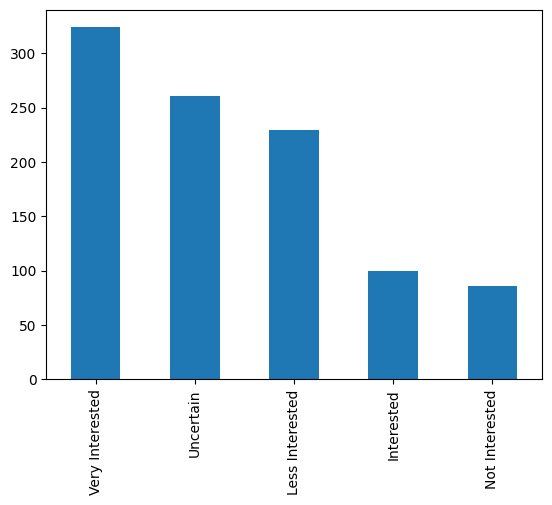

In [26]:
df['interest'].value_counts().plot.bar()

<AxesSubplot: xlabel='interest', ylabel='count'>

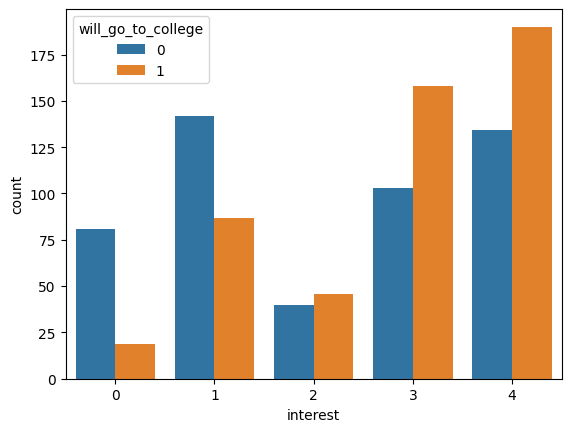

In [33]:
sns.countplot(x = df['interest'], hue = 'will_go_to_college', data = df)

In [12]:
grouped = df.groupby(['will_go_to_college'])['average_grades'].mean()
grouped

will_go_to_college
False    84.39134
True     87.80306
Name: average_grades, dtype: float64

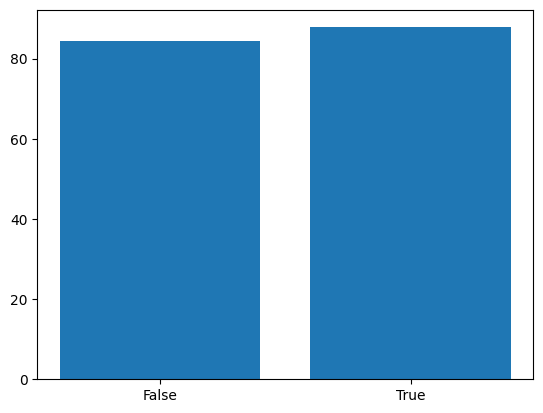

In [8]:
go_college = ['False', 'True']
average_grades = [84.39134, 87.80306]
plt.bar(go_college, average_grades)
plt.show()

In [13]:
grouped = df.groupby(['will_go_to_college', 'gender'])['gender'].count()
grouped

will_go_to_college  gender
False               Female    234
                    Male      266
True                Female    251
                    Male      249
Name: gender, dtype: int64

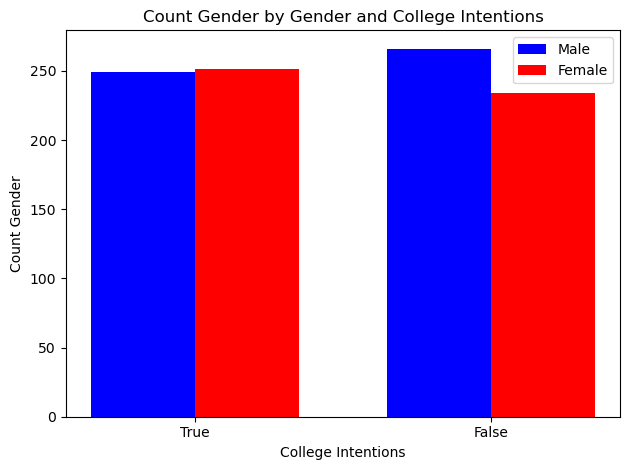

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
male_college = [249, 266]
female_college = [251, 234]

# create plot
fig, ax = plt.subplots()
bar_width = 0.35
X = np.arange(2)

p1 = plt.bar(X, male_college, bar_width, color='b',
label='Male')

# The bar of second plot starts where the first bar ends
p2 = plt.bar(X + bar_width, female_college, bar_width,
color='r',
label='Female')

plt.xlabel('College Intentions')
plt.ylabel('Count Gender')
plt.title('Count Gender by Gender and College Intentions')
plt.xticks(X + (bar_width/2) , ("True", "False"))
plt.legend()

plt.tight_layout()
plt.show()

### Encoding Categorical Features

In [3]:
df['type_school'] = LabelEncoder().fit_transform(df['type_school'])
df['school_accreditation'] = LabelEncoder().fit_transform(df['school_accreditation'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])
df['interest'] = LabelEncoder().fit_transform(df['interest'])
df['residence'] = LabelEncoder().fit_transform(df['residence'])
df['parent_was_in_college'] = LabelEncoder().fit_transform(df['parent_was_in_college'])
df['will_go_to_college'] = LabelEncoder().fit_transform(df['will_go_to_college'])
df.head(10)

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college
0,0,0,1,1,1,56,6950000,83.0,84.09,0,1
1,0,0,1,1,1,57,4410000,76.8,86.91,0,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0
5,1,1,0,1,0,48,3770000,65.3,86.79,1,0
6,0,0,1,4,0,52,6680000,85.5,90.39,1,1
7,0,1,1,4,0,53,5890000,83.3,84.65,1,0
8,0,1,0,3,0,52,6730000,80.3,88.50,1,1
9,0,1,0,4,0,47,3880000,68.0,85.43,1,0


### Feature Selection For Model

In [6]:
# Feature Selecting
X = df.drop(columns='will_go_to_college')
y = df.will_go_to_college

### Build A Model Classification Using Logistic Regression

Using 90-10 Splitting Train Dataset

In [7]:
# Separating dependent and independent features
y = df['will_go_to_college']
X = df.drop(columns=['will_go_to_college'])

# Splitting the training and testing data (90% - 10%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.1, random_state = 100)

In [8]:
# Transformasi/normalisasi data dengan MinMax
columns = ['parent_salary','house_area','parent_age','average_grades']
scaler = MinMaxScaler()
X_train_scale1 = scaler.fit_transform(X_train1[columns])
X_test_scale1 = scaler.transform(X_test1[columns])

In [9]:
X_train1[columns]=X_train_scale1
X_test1[columns]=X_test_scale1

In [10]:
# Model 1
model1 = LogisticRegression(multi_class="auto")
model1.fit(X_train1, y_train1)

LogisticRegression()

In [11]:
# Prediction Model 1
y_pred1 = model1.predict(X_test1)
model1.score(X_test1, y_test1)

0.91

In [12]:
# Regression Model 1
print("coefficents :",model1.coef_ )
print("intercept :", model1.intercept_)

coefficents : [[ 0.00911451 -0.40885607 -0.18105021  0.28740388  1.7711989   0.58252562
   6.11938989  5.3436139   4.94449923  0.65966744]]
intercept : [-10.32501867]


In [13]:
# Evaluate Parameter Model 1
print('accuracy_score: ',accuracy_score(y_test1, y_pred1))
print('f1_score: ',f1_score(y_test1, y_pred1, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test1, y_pred1, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test1, y_pred1, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test1, y_pred1))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test1, y_pred1))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test1, y_pred1)))
print("r2_score : %.2f "% r2_score(y_test1, y_pred1))

accuracy_score:  0.91
f1_score:  0.91
recall_score:  0.91
precision_score:  0.91
mean squared error (MSE) : 0.09 
mean absolute error (MAE) : 0.09 
roots mean squared error (RMSE) : 0.30 
r2_score : 0.64 


In [14]:
# Confosuion Matrix Model 1
confusion_matrix1 = confusion_matrix(y_test1, y_pred1)
confusion_matrix1

array([[47,  2],
       [ 7, 44]], dtype=int64)

In [15]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        49
           1       0.96      0.86      0.91        51

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



Using 80-20 Splitting Train Dataset

In [16]:
# Separating dependent and independent features
y = df['will_go_to_college']
X = df.drop(columns=['will_go_to_college'])

# Splitting the training and testing data (80% - 20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 130)

In [17]:
# Transformasi/normalisasi data dengan MinMax
columns = ['parent_salary','house_area','parent_age','average_grades']
scaler = MinMaxScaler()
X_train_scale2 = scaler.fit_transform(X_train2[columns])
X_test_scale2 = scaler.transform(X_test2[columns])

In [18]:
X_train2[columns]=X_train_scale2
X_test2[columns]=X_test_scale2

In [19]:
# Model 2
model2 = LogisticRegression(multi_class="auto")
model2.fit(X_train2, y_train2)

LogisticRegression()

In [20]:
# Prediction Model 2
y_pred2 = model2.predict(X_test2)
model2.score(X_test2, y_test2)

0.87

In [21]:
# Regression Model 2
print("coefficents :",model2.coef_ )
print("intercept :", model2.intercept_)

coefficents : [[-0.04124778 -0.37464773 -0.12281093  0.27565795  1.74375962  0.40263632
   5.92696595  5.36725406  4.74002063  0.61805868]]
intercept : [-10.0156296]


In [22]:
# Evaluate Parameter Model 2
print('accuracy_score: ',accuracy_score(y_test2, y_pred2))
print('f1_score: ',f1_score(y_test2, y_pred2, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test2, y_pred2, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test2, y_pred2, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test2, y_pred2))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test2, y_pred2))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test2, y_pred2)))
print("r2_score : %.2f "% r2_score(y_test2, y_pred2))

accuracy_score:  0.87
f1_score:  0.87
recall_score:  0.87
precision_score:  0.87
mean squared error (MSE) : 0.13 
mean absolute error (MAE) : 0.13 
roots mean squared error (RMSE) : 0.36 
r2_score : 0.48 


In [23]:
# Confosuion Matrix Model 2
confusion_matrix2 = confusion_matrix(y_test2, y_pred2)
confusion_matrix2

array([[97,  8],
       [18, 77]], dtype=int64)

In [24]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       105
           1       0.91      0.81      0.86        95

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



Using 70-30 Splitting Train Dataset

In [25]:
# Separating dependent and independent features
y = df['will_go_to_college']
X = df.drop(columns=['will_go_to_college'])

# Splitting the training and testing data (70% - 30%)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [27]:
# Transformasi/normalisasi data dengan MinMax
columns = ['parent_salary','house_area','parent_age','average_grades']
scaler = MinMaxScaler()
X_train_scale3 = scaler.fit_transform(X_train3[columns])
X_test_scale3 = scaler.transform(X_test3[columns])

In [28]:
X_train3[columns]=X_train_scale3
X_test3[columns]=X_test_scale3

In [29]:
# Model 3
model3 = LogisticRegression(multi_class="auto")
model3.fit(X_train3, y_train3)

LogisticRegression()

In [30]:
# Prediction Model 3
y_pred3 = model3.predict(X_test3)
model3.score(X_test3, y_test3)

0.8766666666666667

In [31]:
# Regression Model 3
print("coefficents :",model3.coef_ )
print("intercept :", model3.intercept_)

coefficents : [[ 0.01657078 -0.50060317 -0.14434063  0.25462134  1.58759743  0.60430972
   5.48079435  4.69188547  4.72209443  0.56415563]]
intercept : [-9.33202874]


In [32]:
# Evaluate Parameter Model 3
print('accuracy_score: ',accuracy_score(y_test3, y_pred3))
print('f1_score: ',f1_score(y_test3, y_pred3, pos_label='positive', average='micro'))
print('recall_score: ',recall_score(y_test3, y_pred3, pos_label='positive', average='micro'))
print('precision_score: ',precision_score(y_test3, y_pred3, pos_label='positive', average='micro'))
print("mean squared error (MSE) : %.2f "% mean_squared_error(y_test3, y_pred3))
print("mean absolute error (MAE) : %.2f "% mean_absolute_error(y_test3, y_pred3))
print("roots mean squared error (RMSE) : %.2f "% math.sqrt(mean_squared_error(y_test3, y_pred3)))
print("r2_score : %.2f "% r2_score(y_test3, y_pred3))

accuracy_score:  0.8766666666666667
f1_score:  0.8766666666666667
recall_score:  0.8766666666666667
precision_score:  0.8766666666666667
mean squared error (MSE) : 0.12 
mean absolute error (MAE) : 0.12 
roots mean squared error (RMSE) : 0.35 
r2_score : 0.50 


In [33]:
# Confosion Matrix Model 3
confusion_matrix3 = confusion_matrix(y_test3, y_pred3)
confusion_matrix3

array([[140,  19],
       [ 18, 123]], dtype=int64)

In [34]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       159
           1       0.87      0.87      0.87       141

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



### Logistic Regression With HyperTuning

In [35]:
# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = decomposition.PCA()

# Create a logistic regression object with an L2 penalty
logistic = LogisticRegression()

# create a pipeline of three steps, first standardize the data
# second, transform the data with PCA
# third, train a logistic regression on the data
pipe = Pipeline(steps = [('sc', sc),
                        ('pca', pca),
                        ('logistic', logistic)])
# create parameter space
# create a lis of a sequence of integers from 1 to 30 (the number of feature in x+1)
n_components = list(range(1, X.shape[1]+1,1))
# create a list of a values of the regularization penalty
C = np.logspace(-4, 4, 50)
# create a list of a values of the regularization penalty
penalty = ['l1', 'l2']
# create the dictionary of all the parameter option
parameters = dict(pca__n_components = n_components,
                 logistic__C = C,
                 logistic__penalty = penalty)

# conduct parameter optimization with pipeline
# create a grid search object
clf = GridSearchCV(pipe, parameters)

# fit the grid search
clf.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.3257113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [36]:
# view the best parameter
print("Best Penalty :", clf.best_estimator_.get_params()['logistic__penalty'])
print("Best C :", clf.best_estimator_.get_params()['logistic__C'])
print("Best Number :", clf.best_estimator_.get_params()['pca__n_components'])

# Use the cross-validation to evaluate the model
CV_Result = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

Best Penalty : l2
Best C : 0.05963623316594643
Best Number : 10

[0.845 0.89  0.845 0.81  0.865]

0.851

0.02634387974463897


### Classification Using ANN

Using 70-30 Splitting Train Dataset

In [37]:
seed=123
np.random.seed(seed)

In [38]:
# Labelling
y_train11 = np_utils.to_categorical(y_train1, num_classes = 2)
y_test11 = np_utils.to_categorical(y_test1, num_classes = 2)

In [39]:
# Define The Model ANN
def get_model_ann(batch_size, learning_rate):
    model = Sequential()
    model.add(Dense(10,activation='relu', input_shape=(10,)))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(2,activation='sigmoid')) 
    model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)
    history = model.fit(X_train1, y_train11, epochs=100, batch_size=batch_size, validation_data=(X_test1, y_test11), callbacks=[early_stopping])
    return model

In [40]:
# Mendefinisikan Model 
model_ann = KerasClassifier(build_fn=get_model_ann)

#Parameter yang dihypermarameter tuning
params_ann= {'batch_size': [4, 8],
             'learning_rate':[0.001, 0.0001]}

In [41]:
ann = GridSearchCV(model_ann, param_grid=params_ann)

In [42]:
history1 = ann.fit(X_train1, y_train11)

Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.6800 - accuracy: 0.5611 - val_loss: 0.6390 - val_accuracy: 0.6100
Epoch 2/100
225/225 [==============================] - 0s 878us/step - loss: 0.6326 - accuracy: 0.6389 - val_loss: 0.6078 - val_accuracy: 0.6600
Epoch 3/100
225/225 [==============================] - 0s 889us/step - loss: 0.5858 - accuracy: 0.7056 - val_loss: 0.5579 - val_accuracy: 0.7100
Epoch 4/100
225/225 [==============================] - 0s 908us/step - loss: 0.5428 - accuracy: 0.7289 - val_loss: 0.5130 - val_accuracy: 0.7700
Epoch 5/100
225/225 [==============================] - 0s 935us/step - loss: 0.4947 - accuracy: 0.7533 - val_loss: 0.4595 - val_accuracy: 0.7900
Epoch 6/100
225/225 [==============================] - 0s 867us/step - loss: 0.4658 - accuracy: 0.7733 - val_loss: 0.4632 - val_accuracy: 0.7400
Epoch 7/100
225/225 [==============================] - 0s 875us/step - loss: 0.4256 - accuracy: 0.8033 - val_loss: 0.3918 - val_accu

In [43]:
print("\n Parameter Terbaik  {}".format(history1.best_params_))
print("\n Accuracy Terbaik  {}".format(history1.best_score_))


 Parameter Terbaik  {'batch_size': 4, 'learning_rate': 0.001}

 Accuracy Terbaik  0.8933333396911621


In [44]:
# melihat hasil parameter terbaik
print("Best: %f using %s" % (history1.best_score_, history1.best_params_))
means = history1.cv_results_['mean_test_score']
stds = history1.cv_results_['std_test_score']
params = history1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# mengambil model terbaik
best_model1 = history1.best_estimator_.model

Best: 0.893333 using {'batch_size': 4, 'learning_rate': 0.001}
0.893333 (0.020608) with: {'batch_size': 4, 'learning_rate': 0.001}
0.875556 (0.022662) with: {'batch_size': 4, 'learning_rate': 0.0001}
0.887778 (0.015476) with: {'batch_size': 8, 'learning_rate': 0.001}
0.872222 (0.025820) with: {'batch_size': 8, 'learning_rate': 0.0001}


In [45]:
# Define Again and input the learning rate
model = Sequential()
model.add(Dense(10,activation='relu', input_shape=(10,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid')) # gunakan softmax: output > 1,
                                         # gunakan sigmoid: output = 1 
model.compile(loss ='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 10)                110       
                                                                 
 dense_106 (Dense)           (None, 32)                352       
                                                                 
 dense_107 (Dense)           (None, 64)                2112      
                                                                 
 dense_108 (Dense)           (None, 32)                2080      
                                                                 
 dense_109 (Dense)           (None, 2)                 66        
                                                                 
Total params: 4,720
Trainable params: 4,720
Non-trainable params: 0
_________________________________________________________________


In [46]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)


history11 = model.fit(X_train1, y_train11, epochs=100, batch_size=4, validation_data=(X_test1, y_test11), callbacks=[early_stopping])

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5789 - val_loss: 0.6289 - val_accuracy: 0.6400
Epoch 2/100
225/225 [==============================] - 0s 987us/step - loss: 0.6474 - accuracy: 0.6067 - val_loss: 0.5771 - val_accuracy: 0.7700
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.6867 - val_loss: 0.5253 - val_accuracy: 0.7400
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7289 - val_loss: 0.5117 - val_accuracy: 0.7500
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7711 - val_loss: 0.4171 - val_accuracy: 0.8100
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8111 - val_loss: 0.3492 - val_accuracy: 0.8900
Epoch 7/100
225/225 [==============================] - 0s 991us/step - loss: 0.3957 - accuracy: 0.8211 - val_loss: 0.2709 - val_accuracy: 0.

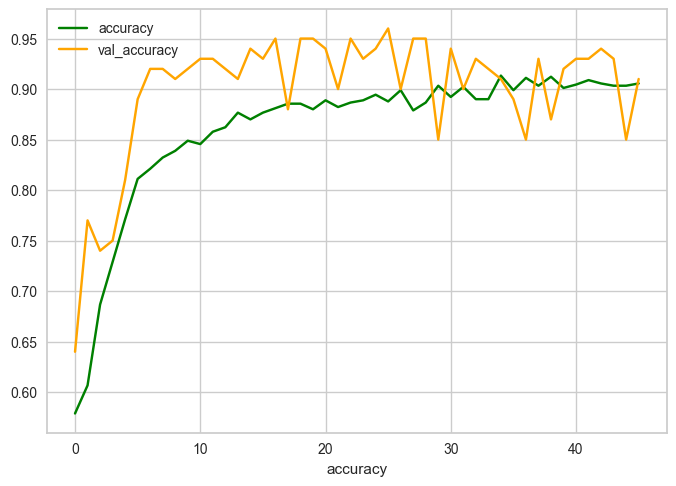

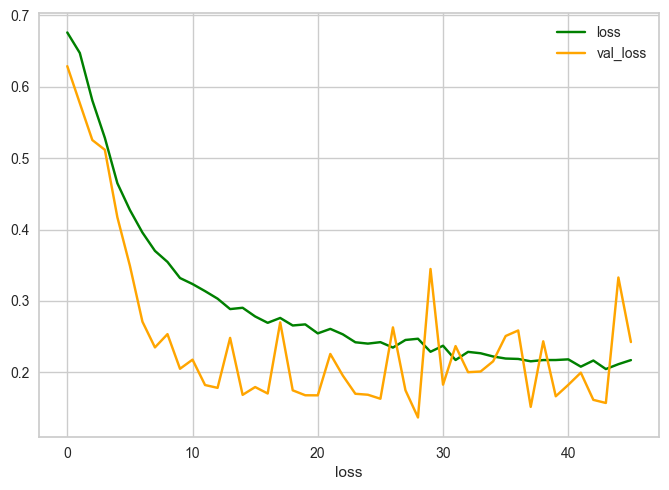

In [47]:
def plot_graphs(history11, string):
    plt.plot(history11.history[string], color = 'green')
    plt.plot(history11.history['val_'+string], color = 'orange')
    plt.xlabel('epoch')
    plt.xlabel(string)
    plt.legend([string, "val_"+string])
    plt.show()

plot_graphs(history11, 'accuracy')
plot_graphs(history11, 'loss')

In [48]:
evaluation = model.evaluate(X_test1, y_test11)

4/4 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9600


In [49]:
ann_pred1 = np.argmax(model.predict(X_test1),axis=1)
ann_pred1

4/4 [==============================] - 0s 0s/step


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [50]:
y_test1 = np.argmax(y_test11,axis=1)
y_test1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
print ('accuracy_score: ',accuracy_score(y_test1,ann_pred1))
print ('f1_score: ',f1_score(y_test1,ann_pred1, pos_label='positive', average='micro'))
print ('recall_score: ',recall_score(y_test1,ann_pred1, pos_label='positive', average='micro'))
print ('precision_score: ',precision_score(y_test1,ann_pred1, pos_label='positive', average='micro'))

accuracy_score:  0.96
f1_score:  0.96
recall_score:  0.96
precision_score:  0.96


### Clustering With K-Means

In [52]:
X_numerics = df[['parent_age', 'parent_salary', 'house_area', 'average_grades']]

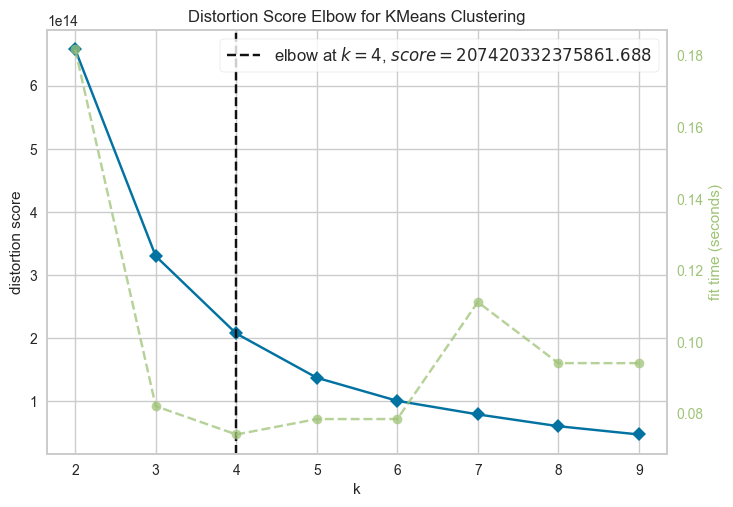

In [53]:
model4 = KMeans(random_state=1)
visualizer = KElbowVisualizer(model4, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

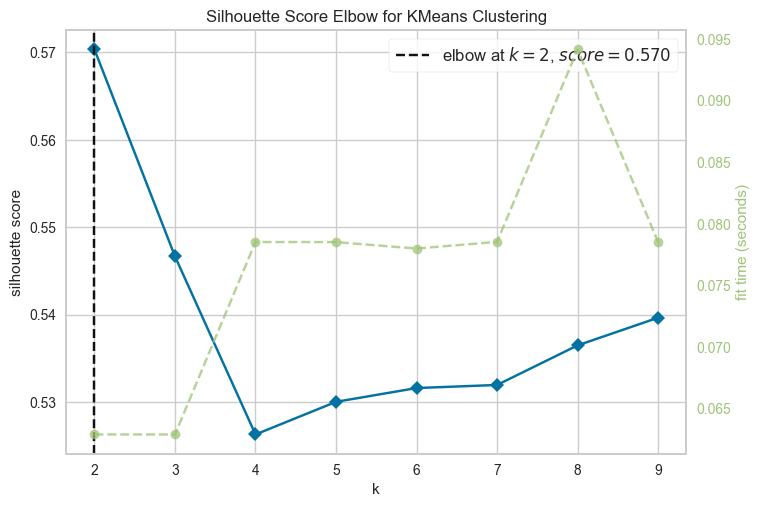

In [54]:
model4 = KMeans(random_state=1)
visualizer = KElbowVisualizer(model4, k=(2,10), metric='silhouette')

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

Cluster = 2

In [55]:
KM_2_clusters = KMeans(n_clusters=2, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM2_clustered = X_numerics.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_

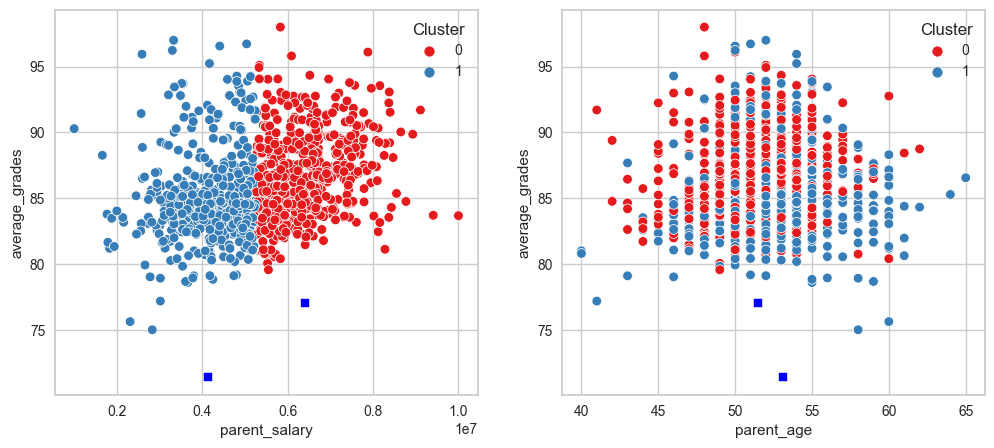

In [56]:
fig1, axes = plt.subplots(1, 2, figsize=(12, 5))

scat_1 = sns.scatterplot(x='parent_salary', y='average_grades', data=KM2_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='parent_age', y='average_grades', data=KM2_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_2_clusters.cluster_centers_[:, 1], KM_2_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
axes[1].scatter(KM_2_clusters.cluster_centers_[:, 0], KM_2_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")

plt.show()

In [57]:
KM_clust_sizes = KM2_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,549
1,451


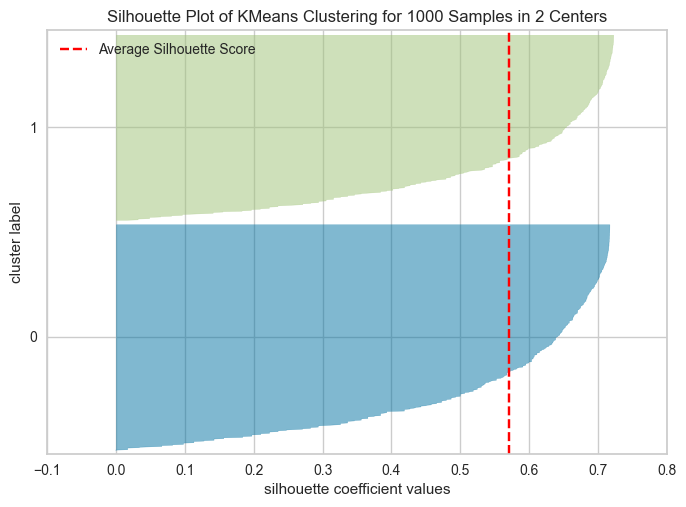

In [58]:
model41 = KMeans(n_clusters=2, random_state=0)
visualizer = SilhouetteVisualizer(model41, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

Cluster = 5

In [62]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics) # initialise and fit K-Means model

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

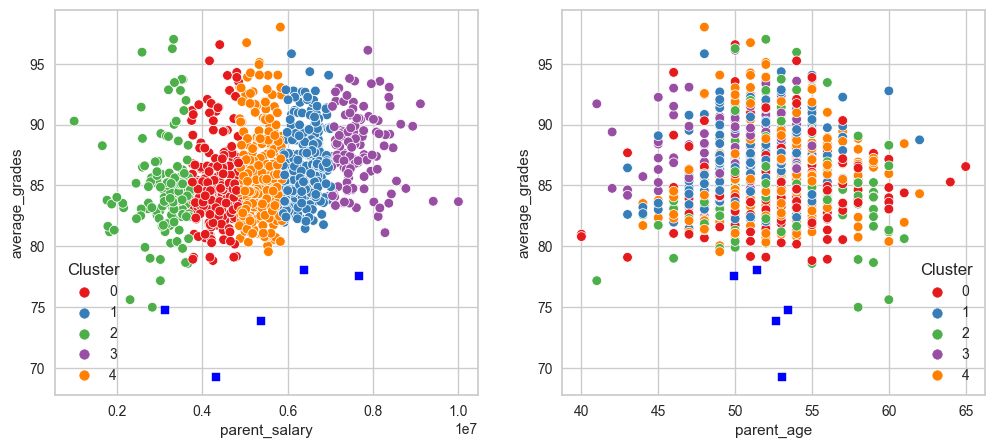

In [63]:
fig2, axes = plt.subplots(1, 2, figsize=(12, 5))

scat_2 = sns.scatterplot(x='parent_salary', y='average_grades', data=KM5_clustered,
                         hue='Cluster', ax=axes[0], palette='Set1', legend='full')

sns.scatterplot(x='parent_age', y='average_grades', data=KM5_clustered,
                hue='Cluster', palette='Set1', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:, 1], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:, 0], KM_5_clusters.cluster_centers_[:, 2], marker='s', s=40, c="blue")

plt.show()

In [64]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,216
1,257
2,136
3,120
4,271


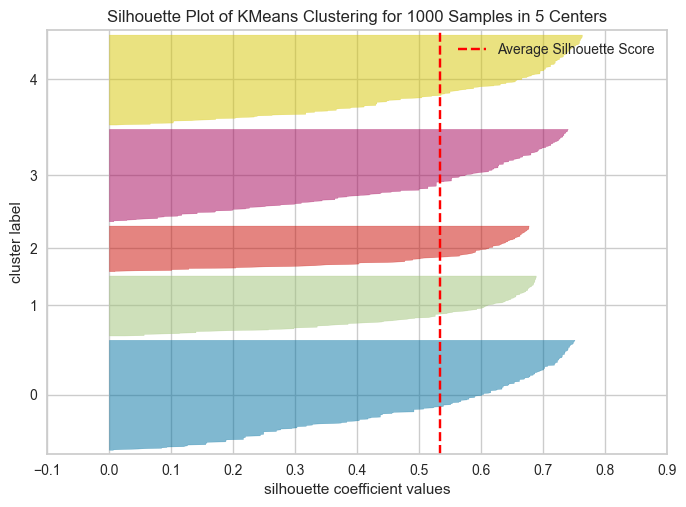

In [65]:
model42 = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model42, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

In [66]:
features1= df.iloc[:, [5,6,7,8]].values
features1 = np.asarray(features1)
print(features1)

[[5.600e+01 6.950e+06 8.300e+01 8.409e+01]
 [5.700e+01 4.410e+06 7.680e+01 8.691e+01]
 [5.000e+01 6.500e+06 8.060e+01 8.743e+01]
 ...
 [4.900e+01 5.550e+06 7.520e+01 7.956e+01]
 [5.300e+01 5.840e+06 1.058e+02 8.718e+01]
 [5.000e+01 2.940e+06 6.910e+01 8.613e+01]]


Text(0.5, 0, 'n_clusters')

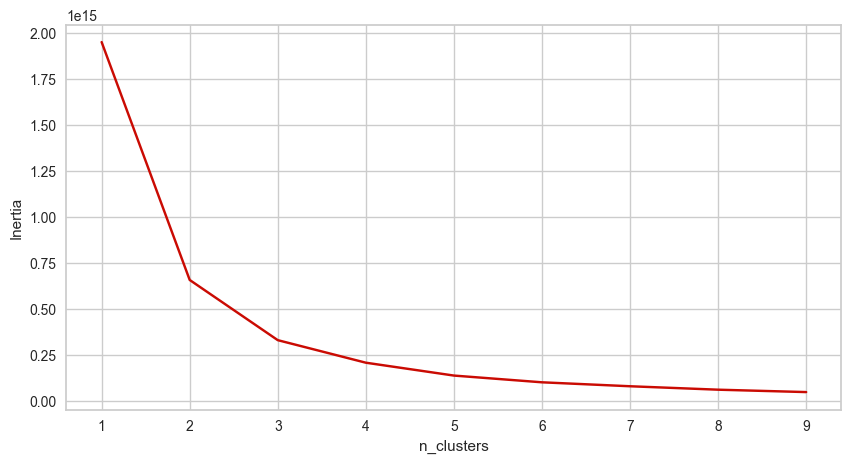

In [67]:
# Mententukan jumlah k cluster dengan Elbow Analysis
ScoreElbow = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(features1)
    
    ScoreElbow.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 10), ScoreElbow, 'r-')
plt.ylabel('Inertia')
plt.xlabel('n_clusters')

Text(0.5, 0, 'n_clusters')

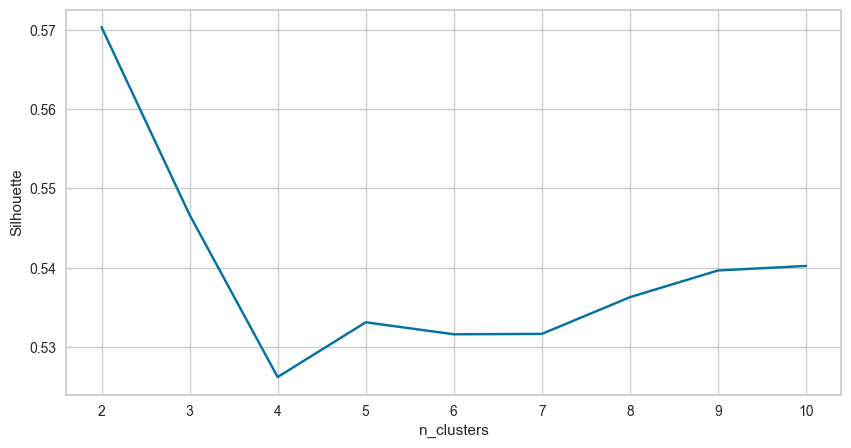

In [68]:
score = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    label = kmeans.fit_predict(features1)
    
    siluet = silhouette_score(features1, label, metric='euclidean')
    score.append(siluet)
    
plt.figure(figsize=(10,5))
plt.plot(range(2, 11), score)
plt.ylabel('Silhouette')
plt.xlabel('n_clusters')

In [69]:
kmeans = KMeans(n_clusters=2,init='k-means++',
               max_iter=300,n_init=10, random_state=0)
pred_y = kmeans.fit_predict(features1)
df['cluster'] = pd.DataFrame(pred_y)
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,will_go_to_college,cluster
0,0,0,1,1,1,56,6950000,83.0,84.09,0,1,0
1,0,0,1,1,1,57,4410000,76.8,86.91,0,1,1
2,0,1,0,4,1,50,6500000,80.6,87.43,0,1,0
3,1,1,1,4,0,49,6600000,78.2,82.12,1,1,0
4,0,0,0,4,1,57,5250000,75.1,86.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,4,0,49,7420000,63.6,85.99,1,1,0
996,0,1,0,1,0,51,7480000,84.3,89.72,1,1,0
997,1,0,1,1,1,49,5550000,75.2,79.56,0,1,0
998,0,1,1,3,0,53,5840000,105.8,87.18,1,1,0


In [70]:
print('Silhouette Score:', silhouette_score(features1, pred_y))

Silhouette Score: 0.5703464736748449
